In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM,Input
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.models import load_model
import random
from sklearn import decomposition
from sklearn.metrics import r2_score
random.seed(42)
np.random.seed(42)

In [3]:
!git clone https://github.com/ShihaoCui/Mydata_1.git

Cloning into 'Mydata_1'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 391 (delta 20), reused 55 (delta 11), pack-reused 326
Receiving objects: 100% (391/391), 356.13 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (230/230), done.


# Data processing

In [4]:
## Data Load
filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 1_Binary Regressor/Case 2/x_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_train = data['x_train']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 1_Binary Regressor/Case 2/y_train.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_train = data['y_train']
y_train = y_train.reshape(-1)

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 1_Binary Regressor/Case 2/x_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
x_test = data['x_test']

filenames = './Mydata_1/XinxunLau3DPrintability/Data of result sharing/Model 1_Binary Regressor/Case 2/y_test.mat'
dataFile = filenames
data = scio.loadmat(dataFile)
y_test = data['y_test']
y_test = y_test.reshape(-1)

# 1. Height:  Data for model traning and testing

In [5]:
x_train.shape

(70, 12)

In [6]:
y_train.shape

(70,)

In [7]:
x_train.shape

(70, 12)

In [8]:
y_train.shape

(70,)

In [9]:
x_test.shape

(18, 12)

In [10]:
y_test.shape

(18,)

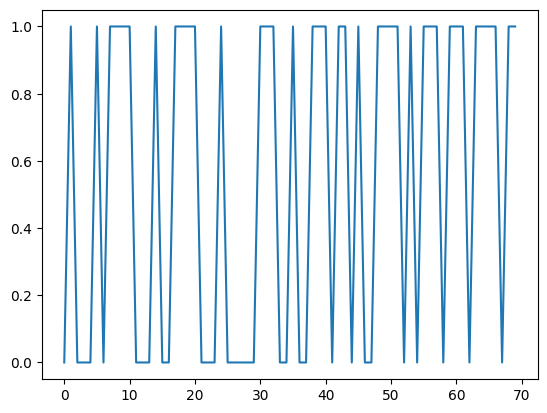

In [11]:
plt.plot(y_train)

### DNNs

In [12]:
from keras.layers import Activation, Dense,BatchNormalization
model= Sequential()
model.add(Dense((128),batch_input_shape=(None,x_train.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((128)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense((16)))
model.add(Activation('relu'))
model.add(Dense((16)))
model.add(Activation('relu'))
model.add(Dense((8)))
model.add(Activation('sigmoid'))
model.add(Dense((1)))
model.compile(loss = 'mse',optimizer = 'Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                2

In [13]:
history2 = model.fit(x_train,y_train,epochs=1000,batch_size=2,validation_data=(x_test,y_test))

Epoch 1/1000
35/35 [==============================] - 5s 10ms/step - loss: 0.3358 - accuracy: 0.5571 - val_loss: 0.2538 - val_accuracy: 0.5556
Epoch 2/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2836 - accuracy: 0.4429 - val_loss: 0.2469 - val_accuracy: 0.6111
Epoch 3/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2440 - accuracy: 0.6286 - val_loss: 0.2475 - val_accuracy: 0.6111
Epoch 4/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.5857 - val_loss: 0.2292 - val_accuracy: 0.6111
Epoch 5/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.6429 - val_loss: 0.2565 - val_accuracy: 0.6111
Epoch 6/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2452 - accuracy: 0.5286 - val_loss: 0.2492 - val_accuracy: 0.6111
Epoch 7/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.2518 - accuracy: 0.5286 - val_loss: 0.2549 - val_accuracy: 0.6111
Epoch

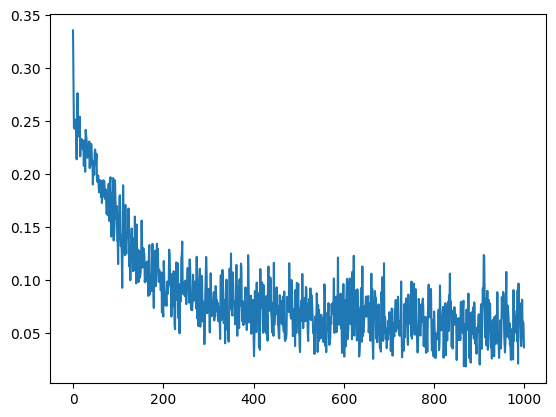

In [14]:
# Loss: convergence or not
plt.plot(history2.history['loss'])
plt.show()

In [15]:
# save as MATLAB mat file
import numpy as np
from scipy.io import savemat
matfile_content = {'loss': history2.history['loss']}
savemat('loss.mat', matfile_content)

3/3 [==============================] - 0s 3ms/step


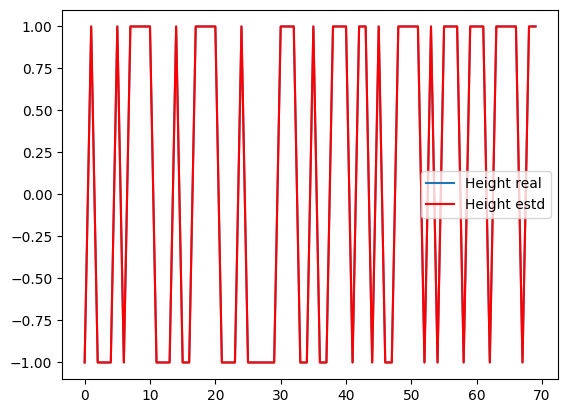

In [16]:
results_d_train = model.predict(x_train)
plt.plot(np.sign(y_train[:]-0.5),label = 'Height real')
plt.plot(np.sign(results_d_train[:]-0.5),c='r',label = 'Height estd')
plt.legend()
plt.show()

In [17]:
y_train.shape

(70,)

In [18]:
# Save the predicted result
matfile_content = {'y_train_predicted':results_d_train}
savemat('y_train_predicted.mat', matfile_content)

1/1 [==============================] - 0s 19ms/step


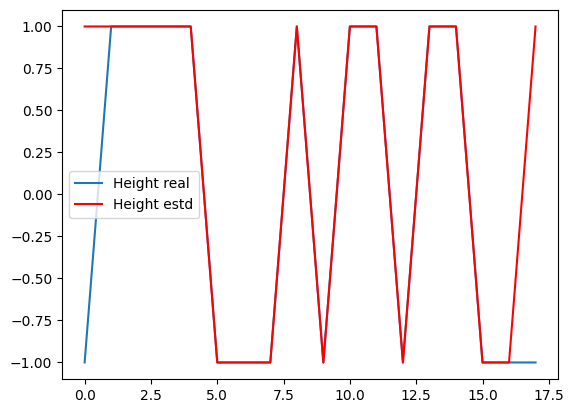

In [19]:
results_d = model.predict(x_test)
plt.plot(np.sign(y_test[:]-0.5),label = 'Height real')
plt.plot(np.sign(results_d[:]-0.5),c='r',label = 'Height estd')
plt.legend()
plt.show()

In [20]:
y_test=y_test.reshape(-1)

In [21]:
results_d = results_d.reshape(-1)
results_d.shape

(18,)

In [22]:
matfile_content = {'y_test_predicted':results_d}
savemat('y_test_predicted.mat', matfile_content)

In [23]:
r2_score(y_test, results_d)

0.6601052936319918

In [24]:
# accuracy
mae = np.mean(np.abs(results_d-y_test))
# 1-mae
mae

0.12463495765890305